#**Import Library**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import sklearn.metrics as skmet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import itertools


# **Generate Data**

In [5]:
np.random.seed(0)
t = np.linspace(0, 100, 500)
y = np.sin(t) + np.random.normal(0, 0.1, 500)

train_size = int(0.8 * len(t))
train_data, test_data = y[:train_size], y[train_size:]

# Define a function to create sequences for training
def create_sequences(data, seq_length):
    sequences = []
    target = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        target.append(data[i+seq_length])
    return np.array(sequences), np.array(target)

# **Train and Building Model**

In [6]:
seq_length = 10
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape the input data for the CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create a CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
input_shape=(seq_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
# Mean Squared Error for regression
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
25/25 - 1s - loss: 0.1660 - val_loss: 0.0387 - 1s/epoch - 50ms/step
Epoch 2/50
25/25 - 0s - loss: 0.0271 - val_loss: 0.0205 - 81ms/epoch - 3ms/step
Epoch 3/50
25/25 - 0s - loss: 0.0162 - val_loss: 0.0168 - 88ms/epoch - 4ms/step
Epoch 4/50
25/25 - 0s - loss: 0.0171 - val_loss: 0.0148 - 87ms/epoch - 3ms/step
Epoch 5/50
25/25 - 0s - loss: 0.0149 - val_loss: 0.0170 - 82ms/epoch - 3ms/step
Epoch 6/50
25/25 - 0s - loss: 0.0149 - val_loss: 0.0180 - 90ms/epoch - 4ms/step
Epoch 7/50
25/25 - 0s - loss: 0.0145 - val_loss: 0.0150 - 76ms/epoch - 3ms/step
Epoch 8/50
25/25 - 0s - loss: 0.0137 - val_loss: 0.0155 - 96ms/epoch - 4ms/step
Epoch 9/50
25/25 - 0s - loss: 0.0148 - val_loss: 0.0159 - 92ms/epoch - 4ms/step
Epoch 10/50
25/25 - 0s - loss: 0.0134 - val_loss: 0.0151 - 76ms/epoch - 3ms/step
Epoch 11/50
25/25 - 0s - loss: 0.0149 - val_loss: 0.0142 - 87ms/epoch - 3ms/step
Epoch 12/50
25/25 - 0s - loss: 0.0158 - val_loss: 0.0143 - 77ms/epoch - 3ms/step
Epoch 13/50
25/25 - 0s - loss: 0.0136 

# **Model Prediction**

3/3 [==============================] - 0s 4ms/step


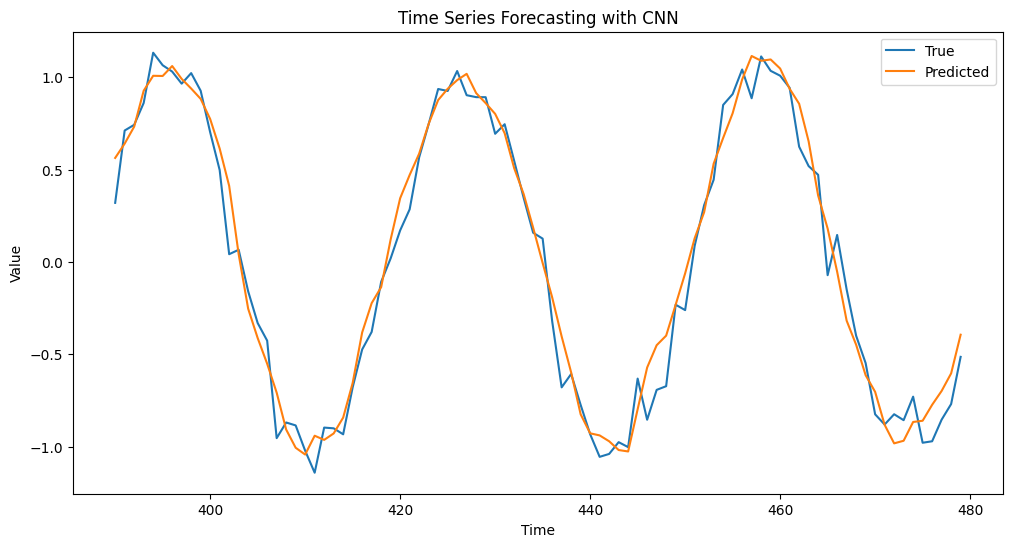

In [7]:
# Make predictions
y_pred = model.predict(X_test)

# Plot the original and predicted time series
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test,
label='True')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred,
label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Forecasting with CNN')
plt.show()

Mean Absolute Error (MAE): 0.10160122970204447
Mean Squared Error (MSE): 0.016720510095386762
Root Mean Squared Error (RMSE): 0.1293078114244718
Symmetric Mean Absolute Percentage Error (sMAPE): 131.88622748685833


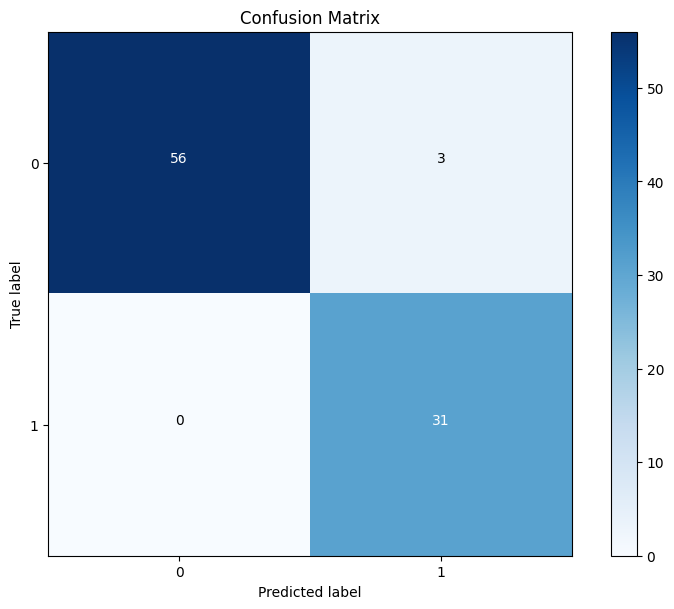

In [10]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

def smape(actual, forecast):
    return 100 * np.mean(2 * np.abs(forecast - actual) / (np.abs(actual) + np.abs(forecast)))

smape_val = smape(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Symmetric Mean Absolute Percentage Error (sMAPE):", smape_val)

# Confusion Matrix
threshold = 0.5
binary_pred = (y_pred >= threshold).astype(int)
binary_actual = (y_test >= threshold).astype(int)

cm = skmet.confusion_matrix(y_true=binary_actual, y_pred=binary_pred)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Define class labels for confusion matrix
cm_plot_labels = ['0', '1']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

plt.show()

In [11]:
from sklearn.metrics import classification_report

# Konversi nilai prediksi menjadi prediksi biner
threshold = 0.5
binary_pred = (y_pred >= threshold).astype(int)
binary_actual = (y_test >= threshold).astype(int)

# Mencetak classification report
print("Classification Report:")
print(classification_report(binary_actual, binary_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        59
           1       0.91      1.00      0.95        31

    accuracy                           0.97        90
   macro avg       0.96      0.97      0.96        90
weighted avg       0.97      0.97      0.97        90

